# Non Progressive Loading and Visualization

This notebook shows the simplest code to download and visualize all the New York Yellow Taxi trips from January 2015. 
The trip data is stored in multiple CSV files, containing geolocated taxi trips.
We visualize the pickup locations, but not progressively (where people have been picked up by the taxis).

In [11]:
# We make sure the libraries are reloaded when modified, and avoid warning messages
# %load_ext autoreload
# %autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Some constants we'll need: the data file to download and final image size
LARGE_TAXI_FILE = "https://www.aviz.fr/nyc-taxi/yellow_tripdata_2015-01.csv.bz2"
RESOLUTION=512

## Define NYC Bounds
If we know the bounds, this will simplify the code.
See https://en.wikipedia.org/wiki/Module:Location_map/data/USA_New_York_City

In [13]:
from dataclasses import dataclass
@dataclass
class Bounds:
    top: float = 40.92
    bottom: float = 40.49
    left: float = -74.27
    right: float = -73.68

bounds = Bounds()

## Load the Data
First, download the data.
Countrary to ProgressiVis, it will take a long time before you see anything.

In [14]:
import pandas as pd

# Create a csv loader filtering out data outside NYC
# %time \
df = pd.read_csv(LARGE_TAXI_FILE, index_col=False, usecols=['pickup_longitude', 'pickup_latitude'])

In [15]:

# Since there are outliers in the files.
def filter_(df):
    lon = df['pickup_longitude']
    lat = df['pickup_latitude']
    return df[
        (lon > bounds.left) &
        (lon < bounds.right) &
        (lat > bounds.bottom) &
        (lat < bounds.top)
    ]
df = filter_(df)

## Visualize the data

In [16]:
try:
    import matplotlib.pyplot as plt
except:
    print("Install matplotlib with: pip install matplotlib")

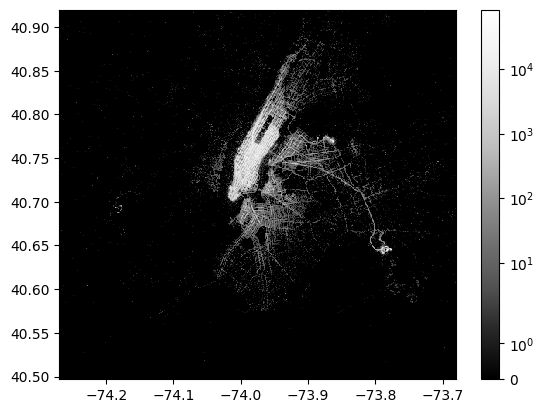

In [17]:
plt.hist2d(df.pickup_longitude, df.pickup_latitude, bins=(RESOLUTION, RESOLUTION), norm="symlog", cmap=plt.cm.Greys_r)
plt.colorbar()
plt.show()